Introduction

This project delves into the application of advanced statistical methods in the context of pairs trading, with a specific focus on the hourly time series data of BIST30 stock indices. The primary objectives encompass the identification of highly correlated stock pairs, modeling their relationships through linear regression, and the subsequent application of control charts for monitoring residuals. Pairs trading, a market-neutral strategy, involves exploiting relative movements between correlated financial instruments. Our approach integrates statistical process control principles, employing control charts to systematically identify deviations from the historical mean relationship of selected stock pairs. The project unfolds in two key tasks: the first involves a basic pairs trading strategy using a constant variance assumption, while the second advances to a more sophisticated strategy incorporating time series analysis with the ARIMA Model. The subsequent steps include fitting regression models, calculating residuals, plotting control charts, generating buy and sell signals, and conducting trading simulations. Through these systematic processes, the project aims to provide insights into the effectiveness of both basic and advanced pairs trading strategies in the context of BIST30 stock indices.


In [79]:
import pandas as pd
import os

# Specify the path to your folder
folder_path = r'20180101_20231121_bist30'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Append the current DataFrame to the combined_data DataFrame
        combined_data = combined_data.append(df, ignore_index=True)

# Display the combined DataFrame
print(combined_data)

                        timestamp  price short_name
0       2018-01-02 09:00:00+03:00  15.79      THYAO
1       2018-01-02 10:00:00+03:00  16.01      THYAO
2       2018-01-02 11:00:00+03:00  16.05      THYAO
3       2018-01-02 12:00:00+03:00  16.05      THYAO
4       2018-01-02 13:00:00+03:00  16.06      THYAO
...                           ...    ...        ...
439127  2023-11-21 09:00:00+03:00  17.16      YKBNK
439128  2023-11-21 10:00:00+03:00  17.07      YKBNK
439129  2023-11-21 11:00:00+03:00  17.04      YKBNK
439130  2023-11-21 12:00:00+03:00  17.05      YKBNK
439131  2023-11-21 13:00:00+03:00  16.99      YKBNK

[439132 rows x 3 columns]


In [80]:
# Initialize an empty dictionary to store DataFrames by short_name
data_by_short_name = {}
# Get unique short_name values in the current DataFrame
unique_short_names = combined_data['short_name'].unique()

# Create a single DataFrame for each short_name and concatenate them
for short_name in unique_short_names:
    # Filter rows based on short_name
    filtered_df = combined_data[combined_data['short_name'] == short_name]
    
    # Concatenate the DataFrame for each short_name
    if short_name in data_by_short_name:
        data_by_short_name[short_name] = pd.concat([data_by_short_name[short_name], filtered_df], ignore_index=True)
    else:
        data_by_short_name[short_name] = filtered_df

# Display concatenated DataFrames for each short_name
for short_name, data_frame in data_by_short_name.items():
    print(f"\nShort Name: {short_name}")
    print(data_frame)


Short Name: THYAO
                        timestamp   price short_name
0       2018-01-02 09:00:00+03:00   15.79      THYAO
1       2018-01-02 10:00:00+03:00   16.01      THYAO
2       2018-01-02 11:00:00+03:00   16.05      THYAO
3       2018-01-02 12:00:00+03:00   16.05      THYAO
4       2018-01-02 13:00:00+03:00   16.06      THYAO
...                           ...     ...        ...
427092  2023-11-21 09:00:00+03:00  256.00      THYAO
427093  2023-11-21 10:00:00+03:00  255.00      THYAO
427094  2023-11-21 11:00:00+03:00  257.75      THYAO
427095  2023-11-21 12:00:00+03:00  258.25      THYAO
427096  2023-11-21 13:00:00+03:00  258.25      THYAO

[14642 rows x 3 columns]

Short Name: AKBNK
                        timestamp    price short_name
640     2018-01-02 09:00:00+03:00   6.9475      AKBNK
641     2018-01-02 10:00:00+03:00   7.0602      AKBNK
642     2018-01-02 11:00:00+03:00   7.0954      AKBNK
643     2018-01-02 12:00:00+03:00   7.0814      AKBNK
644     2018-01-02 13:00:00+03

In [81]:
dataframes = list(data_by_short_name.values())

# Initialize an empty DataFrame to store correlation coefficients
correlation_df = pd.DataFrame()

# Loop through each pair of DataFrames
for i in range(len(dataframes)):
    for j in range(i + 1, len(dataframes)):
        # Extract the short_name for each pair
        short_name_i = dataframes[i]['short_name'].iloc[0]
        short_name_j = dataframes[j]['short_name'].iloc[0]

        # Extract the 'price' columns for each pair and reset index
        prices_i = dataframes[i]['price'].reset_index(drop=True)
        prices_j = dataframes[j]['price'].reset_index(drop=True)

        # Create a DataFrame with the 'price' columns for the current pair
        df_test = pd.DataFrame({'price1': prices_i, 'price2': prices_j})

        # Calculate the correlation matrix for the current pair
        correlation_matrix = df_test.corr()

        # Extract the correlation coefficient between 'price1' and 'price2'
        correlation_coefficient = correlation_matrix.loc['price1', 'price2']

        # Append the information to the correlation DataFrame
        correlation_df = correlation_df.append({
            'Stock1': short_name_i,
            'Stock2': short_name_j,
            'Correlation': correlation_coefficient
        }, ignore_index=True)

# Display the correlation coefficients
print("Correlation Coefficients:")
print(correlation_df)

# Filter highly correlated stocks (you can adjust the threshold as needed)
threshold = 0.989
highly_correlated_stocks = correlation_df[correlation_df['Correlation'].abs() > threshold]

# Display the highly correlated stocks
print("\nHighly Correlated Stocks:")
print(highly_correlated_stocks)

Correlation Coefficients:
    Stock1 Stock2  Correlation
0    THYAO  AKBNK     0.978084
1    THYAO  ARCLK     0.955657
2    THYAO  ASELS     0.976663
3    THYAO  BIMAS     0.951404
4    THYAO  DOHOL     0.971670
..     ...    ...          ...
430  ISCTR  VESTL     0.873092
431  ISCTR  YKBNK     0.988707
432  VAKBN  VESTL     0.788349
433  VAKBN  YKBNK     0.930960
434  VESTL  YKBNK     0.902111

[435 rows x 3 columns]

Highly Correlated Stocks:
    Stock1 Stock2  Correlation
14   THYAO  PGSUS     0.992990
37   AKBNK  GARAN     0.992619
298  KCHOL  YKBNK     0.989403


In order to obtain 3 highly correlated pairs, the threshold for the correlation coefficient is determined as 0.989. By doing so, THYAO and PGSUS is the pair having highest correlation, which is not surprising because they are in the same sector and the places they are currently covering are almost the same.
Secondly, AKBNK and GARAN have the second highest correlation coefficient because they are also in the same sector.
Finally, KCHOL and YKBNK has a very high correlation coefficient because Yapıkredi Bank is a subsidiary of Koc Holding.

 1. Identifying Highly Correlated Stocks:
 
Highly correlated stocks have been identified based on their correlation coefficients. For example:
The correlation between THYAO and PGSUS is 0.992990.
The correlation between AKBNK and GARAN is 0.992619.
The correlation between KCHOL and YKBNK is 0.989403.


2. Fitting a Regression Line and Calculating Residuals:

After these pairs were identified, a linear regression line was fitted to model the relationship between the stock pairs. The regression line represents the expected relationship between the paired stocks. Subsequently, residuals, which are the differences between the actual values and the values predicted by the regression line, were calculated.


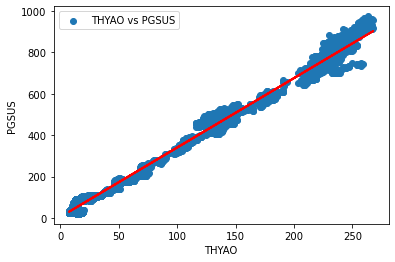

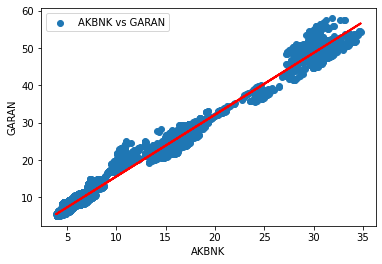

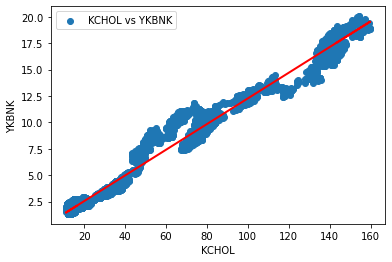

Regression Results:
  Stock1 Stock2     Slope  Intercept
0  THYAO  PGSUS  3.355636   5.065494
1  AKBNK  GARAN  1.656411  -0.956751
2  KCHOL  YKBNK  0.121485   0.115707


In [82]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


highly_correlated_stocks = correlation_df[correlation_df['Correlation'].abs() > 0.989]

# Initialize an empty DataFrame to store regression results
regression_results = pd.DataFrame()

# Loop through each highly correlated stock pair
for index, row in highly_correlated_stocks.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']

    # Extract the 'price' columns for each stock and reset index
    prices_stock1 = data_by_short_name[stock1]['price'].reset_index(drop=True)
    prices_stock2 = data_by_short_name[stock2]['price'].reset_index(drop=True)

    # Drop NaN values before preparing the data for linear regression
    df_pair = pd.DataFrame({stock1: prices_stock1, stock2: prices_stock2}).dropna()

    # Prepare the data for linear regression
    X = df_pair[[stock1]]
    y = df_pair[stock2]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    # Append the results to the regression_results DataFrame
    regression_results = regression_results.append({
        'Stock1': stock1,
        'Stock2': stock2,
        'Slope': slope,
        'Intercept': intercept
    }, ignore_index=True)

    # Plot the regression line
    plt.scatter(X, y, label=f'{stock1} vs {stock2}')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.xlabel(stock1)
    plt.ylabel(stock2)
    plt.legend()
    plt.show()

# Display the regression results
print("Regression Results:")
print(regression_results)

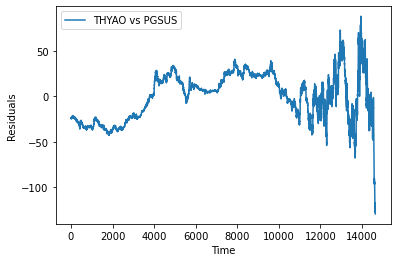

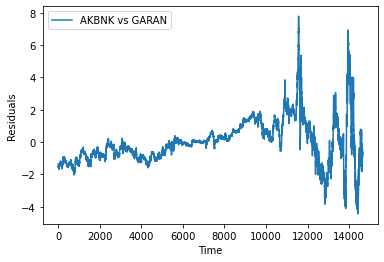

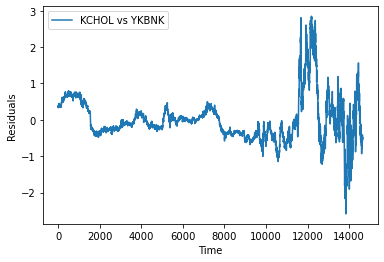

Residuals DataFrame:
       THYAO_PGSUS_residuals                  timestamp  \
0                 -24.070981  2018-01-02 09:00:00+03:00   
1                 -24.509221  2018-01-02 10:00:00+03:00   
2                 -23.903447  2018-01-02 11:00:00+03:00   
3                 -23.823447  2018-01-02 12:00:00+03:00   
4                 -23.877003  2018-01-02 13:00:00+03:00   
...                      ...                        ...   
14632            -117.108223  2023-11-21 09:00:00+03:00   
14633            -123.752587  2023-11-21 10:00:00+03:00   
14634            -128.480585  2023-11-21 11:00:00+03:00   
14635            -127.658403  2023-11-21 12:00:00+03:00   
14636            -129.158403  2023-11-21 13:00:00+03:00   

       AKBNK_GARAN_residuals                  timestamp  \
0                  -1.346464  2018-01-02 09:00:00+03:00   
1                  -1.422142  2018-01-02 10:00:00+03:00   
2                  -1.454747  2018-01-02 11:00:00+03:00   
3                  -1.448758  2018

In [83]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize an empty DataFrame to store residuals
residuals_df = pd.DataFrame()

# Loop through each pair of stocks
for index, row in regression_results.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']

    # Extract the 'timestamp' and 'price' columns for each stock and reset index
    data_stock1 = data_by_short_name[stock1][['timestamp', 'price']].reset_index(drop=True)
    data_stock2 = data_by_short_name[stock2][['timestamp', 'price']].reset_index(drop=True)

    # Merge data on 'timestamp'
    df_pair = pd.merge(data_stock1, data_stock2, on='timestamp', how='inner', suffixes=(f'_{stock1}', f'_{stock2}'))

    # Check if there are still rows remaining after merging
    if not df_pair.empty:
        # Prepare the data for residuals calculation
        X = df_pair[[f'price_{stock1}']]
        y = df_pair[f'price_{stock2}']

        # Create and fit the linear regression model
        model = LinearRegression()
        model.intercept_ = row['Intercept']
        model.coef_ = np.array([row['Slope']])  # Reshape to one-element array

        # Calculate predicted values
        predicted_values = model.predict(X)

        # Calculate residuals
        residuals = y - predicted_values

        # Append the results to the residuals_df DataFrame
        residuals_df = pd.concat([residuals_df, pd.DataFrame({f'{stock1}_{stock2}_residuals': residuals, 'timestamp': df_pair['timestamp']})], axis=1).dropna()

        # Plot residuals over time
        plt.plot(residuals, label=f'{stock1} vs {stock2}')
        plt.xlabel('Time')
        plt.ylabel('Residuals')
        plt.legend()
        plt.show()
    else:
        print(f"Insufficient data for residuals calculation for {stock1} vs {stock2}.")

# Display the residuals DataFrame
print("Residuals DataFrame:")
print(residuals_df)


3. Plotting Control Chart for Residuals:

Control charts for the residuals were created to visualize whether the residuals are within acceptable limits or if there are significant deviations. Typically, control charts include upper and lower control limits. Residuals outside these limits may indicate potential trading opportunities.


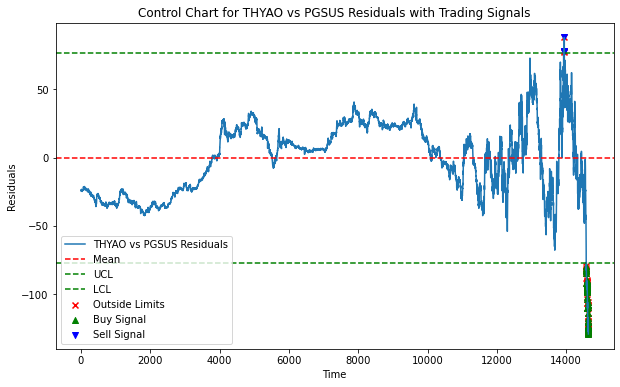

Buy Signals for THYAO vs PGSUS: 14576, 14578, 14580, 14581, 14582, 14583, 14584, 14585, 14586, 14587, 14588, 14589, 14590, 14591, 14592, 14593, 14594, 14595, 14596, 14597, 14598, 14599, 14600, 14601, 14602, 14603, 14604, 14605, 14606, 14607, 14608, 14609, 14610, 14611, 14612, 14613, 14614, 14615, 14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625, 14626, 14627, 14628, 14629, 14630, 14631, 14632, 14633, 14634, 14635, 14636, 14637
Sell Signals for THYAO vs PGSUS: 13924, 13925, 13943




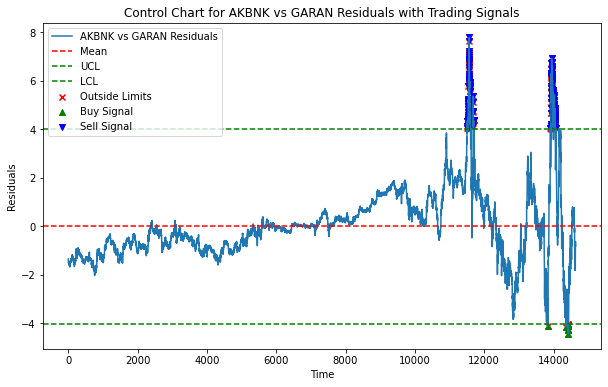

Buy Signals for AKBNK vs GARAN: 13830, 14368, 14404, 14418, 14419, 14421, 14422, 14424, 14425, 14426, 14428, 14429, 14430, 14431
Sell Signals for AKBNK vs GARAN: 11507, 11508, 11513, 11521, 11522, 11523, 11526, 11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11536, 11537, 11538, 11539, 11540, 11541, 11542, 11543, 11544, 11545, 11546, 11547, 11548, 11549, 11550, 11551, 11552, 11553, 11554, 11555, 11556, 11557, 11558, 11559, 11560, 11561, 11562, 11563, 11564, 11565, 11566, 11567, 11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11577, 11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11587, 11588, 11589, 11590, 11591, 11592, 11593, 11594, 11595, 11596, 11597, 11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606, 11684, 11685, 11686, 11687, 11688, 11689, 11690, 11691, 11692, 11693, 11694, 11695, 13912, 13914, 13919, 13920, 13924, 13925, 13926, 13927, 13928, 13929, 13930, 13931, 13932, 13933, 13934, 13935, 13936, 13937, 13938, 13939, 13940, 13941

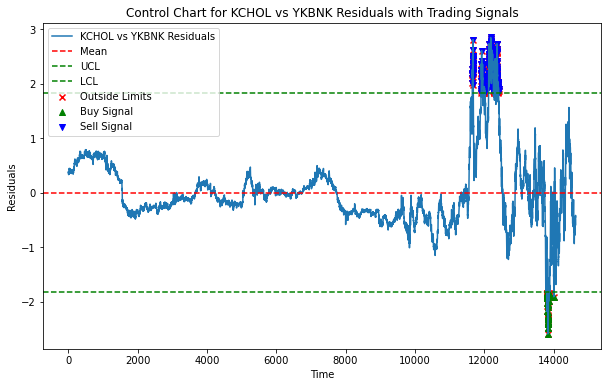

Buy Signals for KCHOL vs YKBNK: 13808, 13809, 13810, 13811, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13822, 13823, 13824, 13825, 13833, 13834, 13835, 13836, 13837, 13838, 13839, 13840, 13841, 13842, 13843, 13844, 13845, 13846, 13847, 13848, 13849, 13850, 13851, 13852, 13853, 13854, 13855, 13856, 13857, 13858, 13859, 13860, 13870, 14008
Sell Signals for KCHOL vs YKBNK: 11657, 11658, 11659, 11660, 11661, 11662, 11663, 11664, 11665, 11666, 11667, 11668, 11669, 11670, 11671, 11672, 11673, 11674, 11675, 11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684, 11685, 11914, 11915, 11916, 11917, 11918, 11919, 11920, 11921, 11922, 11923, 11924, 11925, 11926, 11927, 11928, 11929, 11930, 11931, 11932, 11933, 11934, 11935, 11936, 11937, 11938, 11939, 11940, 11941, 11942, 11943, 11944, 11945, 11946, 11947, 11948, 11949, 11950, 11951, 11952, 11953, 11954, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963, 11964, 11966, 11972, 11978, 11979, 11980, 11981, 11982, 11983, 11988

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store buy and sell signals for each stock pair
buy_signals_dict = {}
sell_signals_dict = {}

# Function to create control charts and identify trading opportunities
def control_chart_with_trading_signals(residuals, stock_pair):
    # Calculate mean and standard deviation of residuals
    mean_residuals = residuals.mean()
    std_residuals = residuals.std()

    # Define control limits (typically set at 3 standard deviations)
    UCL = mean_residuals + 3 * std_residuals
    LCL = mean_residuals - 3 * std_residuals

    # Create time values for x-axis
    time_values = range(1, len(residuals) + 1)

    # Identify points outside control limits
    outside_limits = (residuals > UCL) | (residuals < LCL)

    # Initialize lists to store buy and sell signals
    buy_signals = []
    sell_signals = []

    # Plot residuals and control limits
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, residuals, label=f'{stock_pair} Residuals')
    plt.axhline(mean_residuals, color='red', linestyle='--', label='Mean')
    plt.axhline(UCL, color='green', linestyle='--', label='UCL')
    plt.axhline(LCL, color='green', linestyle='--', label='LCL')
    
    # Mark points outside control limits
    if any(outside_limits):
        plt.scatter(np.where(outside_limits)[0] + 1, residuals[outside_limits], color='red', marker='x', label='Outside Limits')
        
        # Identify potential trading opportunities
        sell_signals = np.where(residuals > UCL)[0] + 1
        buy_signals = np.where(residuals < LCL)[0] + 1

        # Mark buy signals
        if any(buy_signals):
            plt.scatter(buy_signals, residuals[buy_signals - 1], color='green', marker='^', label='Buy Signal')

        # Mark sell signals
        if any(sell_signals):
            plt.scatter(sell_signals, residuals[sell_signals - 1], color='blue', marker='v', label='Sell Signal')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.title(f'Control Chart for {stock_pair} Residuals with Trading Signals')
    plt.legend()
    
    # Show the plot
    plt.show()

    # Store buy and sell signals in the dictionary
    buy_signals_dict[stock_pair] = buy_signals
    sell_signals_dict[stock_pair] = sell_signals

    # Print buy and sell signals for the current stock pair
    print(f"Buy Signals for {stock_pair}: {', '.join(map(str, buy_signals))}")
    print(f"Sell Signals for {stock_pair}: {', '.join(map(str, sell_signals))}")
    print("\n")

# Loop through each pair of stocks and create control charts with trading signals
for index, row in regression_results.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']
    stock_pair = f'{stock1} vs {stock2}'
    
    # Extract residuals for the current pair
    residuals_col_name = f'{stock1}_{stock2}_residuals'
    residuals = residuals_df[residuals_col_name]

    # Create control chart with trading signals
    control_chart_with_trading_signals(residuals, stock_pair)

# Print the buy and sell signals dictionaries
print("Buy Signals Dictionary:")
print({key: ', '.join(map(str, value)) for key, value in buy_signals_dict.items()})
print("\nSell Signals Dictionary:")
print({key: ', '.join(map(str, value)) for key, value in sell_signals_dict.items()})


4. Taking Buy and Sell Signals:

Based on the control chart, points were identified where residuals go beyond the control limits. These out-of-control points serve as signals for potential trading actions. For example:
If the residual goes above the upper control limit, it might be considered a sell signal.
If the residual goes below the lower control limit, it might be considered a buy signal.


In [85]:
import pandas as pd

# Group the combined_data by the 'short_name' column
grouped = combined_data.groupby('short_name')

# Create a dictionary to store DataFrames for each short_name
dfs_by_short_name = {}

# Iterate through groups and create DataFrames
for short_name, group_df in grouped:
    # Store each DataFrame with the short_name as the key
    dfs_by_short_name[short_name] = group_df

# Now, dfs_by_short_name is a dictionary where keys are short_names and values are corresponding DataFrames

5. Conducting a Simulation:

Using these buy and sell signals, a trading simulation was conducted. In the simulation, buy and sell orders for the corresponding stocks were executed based on the signals generated by the control chart. The simulation tracked the performance of the trading strategy over a specified period, considering factors such as trading capital and transaction costs.


In [86]:
# Specify your initial trading capital
initial_capital = 1000000 

# Dictionary to store balances after each transaction
balances_dict = {}

# Function to simulate trading based on signals
def simulate_trading(stock_pair, buy_signals, sell_signals):
    capital = initial_capital
    position_size1 = 0  # Specify the number of stocks bought for stock1
    position_size2 = 0  # Specify the number of stocks bought for stock2
    balances = [capital]
    pair_list = stock_pair.split(" vs ")
    stock_name1 = pair_list[0]
    stock_name2 = pair_list[1]

    # Buy and sell simulation loop
    for i in range(max(len(buy_signals), len(sell_signals))):
        buy_index = buy_signals[i] - 1 if i < len(buy_signals) else 0
        sell_index = sell_signals[i] - 1 if i < len(sell_signals) else 0

        # Check if indices are within bounds and set prices for both stocks
        if (0 <= buy_index < len(residuals)) and (0 <= sell_index < len(residuals)):
            buy_price1 = dfs_by_short_name[stock_name1].iloc[buy_index]['price'] if buy_index != 0 else 0
            sell_price1 = dfs_by_short_name[stock_name1].iloc[sell_index]['price'] if sell_index != 0 else 0
            buy_price2 = dfs_by_short_name[stock_name2].iloc[buy_index]['price'] if buy_index != 0 else 0
            sell_price2 = dfs_by_short_name[stock_name2].iloc[sell_index]['price'] if sell_index != 0 else 0

            # Buy signal for stock1 and sell signal for stock2
            if buy_price1 != 0 and capital >= buy_price1*100:
                capital -= 100 * buy_price1
                position_size1 += 100

            if buy_price2 != 0 and position_size2 >= 100:
                capital += 100 * buy_price2
                position_size2 -= 100

            # Sell signal for stock1 and buy signal for stock2
            if sell_price1 != 0 and position_size1 >= 100:
                capital += 100 * sell_price1
                position_size1 -= 100

            if sell_price2 != 0 and capital >= sell_price2*100:
                capital -= 100 * sell_price2
                position_size2 += 100

        # Store balance after each transaction
        balances.append(capital)

    # Store balances in the dictionaries
    balances_dict[stock_pair] = balances

    # Print the final capital for the current stock pair
    print(f"Final Capital for {stock_pair}: {capital:.2f}")

    # Print the balances after each transaction
    print(f"Balances for {stock_pair} after each transaction: {balances}\n")

# Loop through each pair of stocks and simulate trading
for index, row in regression_results.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']
    stock_pair = f'{stock1} vs {stock2}'
    
    # Extract residuals for the current pair
    residuals_col_name = f'{stock1}_{stock2}_residuals'
    residuals = residuals_df[residuals_col_name]

    # Extract buy and sell signals for the current pair
    buy_signals = buy_signals_dict.get(stock_pair, [])
    sell_signals = sell_signals_dict.get(stock_pair, [])

    # Simulate trading based on signals
    simulate_trading(stock_pair, buy_signals, sell_signals)


Final Capital for THYAO vs PGSUS: 9900.00
Balances for THYAO vs PGSUS after each transaction: [1000000, 908500.0, 888740.0, 866090.0, 912480.0, 888650.0, 864820.0, 841080.0, 817450.0, 794190.0, 770970.0, 747670.0, 724170.0, 700620.0, 677210.0, 653760.0, 630290.0, 606860.0, 583090.0, 559400.0, 535690.0, 511900.0, 488310.0, 464600.0, 440930.0, 417370.0, 393800.0, 370120.0, 346450.0, 322870.0, 299310.0, 275740.0, 252040.0, 228260.0, 204360.0, 180330.0, 156310.0, 132130.0, 107910.0, 83490.0, 59060.0, 34640.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0, 9900.0]

Final Capital for AKBNK vs GARAN: 125783.78
Balances for AKBNK vs GARAN after each transaction: [1000000, 996202.1900000001, 996868.78, 997464.0200000001, 998031.9600000002, 998573.8200000002, 999123.1100000002, 999678.1200000002, 1000232.8000000002, 1000753.3700000001, 1001255.0900000001, 1001733.8400000001, 1002223.1200000001, 10027

Advanced Pairs Trading Strategy Using Time Series Analysis:

1. Utilizing ARIMA Model for Time Series Analysis:

For an advanced time series analysis, the ARIMA (AutoRegressive Integrated Moving Average) Model was chosen. Since the ARIMA Model typically operates on a single dataset, the approach involved calculating ratios between the pairs. This resulted in a modified dataset structured as follows:


In [87]:
dfs = []

# Iterate through all pairs of stocks
for index, row in highly_correlated_stocks.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']

    # Extract the 'price' columns for each stock and reset index
    prices_stock1 = data_by_short_name[stock1]['price'].reset_index(drop=True)
    prices_stock2 = data_by_short_name[stock2]['price'].reset_index(drop=True)

    # Drop NaN values before preparing the data for ratio calculation
    df_pair = pd.DataFrame({stock1: prices_stock1, stock2: prices_stock2}).dropna()

    # Calculate the ratio between the prices of the two stocks
    ratio_column_name = f'{stock1}_{stock2}_Ratio'
    df_pair[ratio_column_name] = df_pair[stock2] / df_pair[stock1] #PGSUS/THYAO , GARAN/AKBNK, YKBNK/KCHOL

    # Append the dataframe to the list
    dfs.append(df_pair[[ratio_column_name]])

# Concatenate all dataframes in the list into a single dataframe
result_df = pd.concat(dfs, axis=1)

# Display the resulting dataframe
result_df = result_df.dropna()
result_df

,THYAO_PGSUS_Ratio,AKBNK_GARAN_Ratio,KCHOL_YKBNK_Ratio
0,2.151995,1.324894,0.151479
1,2.141162,1.319467,0.152771
2,2.181931,1.316543,0.151450
3,2.186916,1.316717,0.152258
4,2.184309,1.314035,0.151532
...,...,...,...
14632,2.906615,1.598941,0.118150
14633,2.864917,1.603974,0.118207
14634,2.893659,1.601057,0.118676
14635,2.923379,1.600658,0.119398


2. Fitting ARIMA Model and Obtaining Residuals:

With this modified dataset, the ARIMA Model was fitted, and new residuals were obtained. The ARIMA Model allows for a more sophisticated time series analysis, capturing temporal dependencies and trends within the data.


In [88]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    # Augmented Dickey-Fuller test to see if the data is stationary or not 
    # Null hypothesis of this test is "data is not stationary". So, p-value<0.05 indicates we reject the null hypothesis at 95% confidence level
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    

THYA0_PGSUS = result_df['THYAO_PGSUS_Ratio'].dropna()
test_stationarity(THYA0_PGSUS)

AKBNK_GARAN = result_df['AKBNK_GARAN_Ratio'].dropna()
test_stationarity(AKBNK_GARAN)

KCHOL_YKBNK = result_df['KCHOL_YKBNK_Ratio'].dropna()
test_stationarity(KCHOL_YKBNK)
    



Results of Dickey-Fuller Test:
Test Statistic                    -1.616895
p-value                            0.474357
#Lags Used                        35.000000
Number of Observations Used    14601.000000
Critical Value (1%)               -3.430798
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566875
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    -3.191878
p-value                            0.020460
#Lags Used                        41.000000
Number of Observations Used    14595.000000
Critical Value (1%)               -3.430798
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566875
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    -2.764194
p-value                            0.063573
#Lags Used                        25.000000
Number of Observations Used    14611.000000
Critical Value (1%)               -3.430798
Critical Value (5%)               -2.8617

p-value for THYAO_PGSUS's ratio indicates that the data is not stationary with 95% confidence and we need to take the difference.
p-value for AKBNK_GARAN's ratio  indicates that the data is stationarywith 95% confidence.
p-value for KCHOL_YKBNK's ratio is not stationary with 95% confidence but stationary with 90% confidence, we can take the difference

In [89]:
# Difference the residuals
residuals_diff_1 = result_df['THYAO_PGSUS_Ratio'].diff().dropna()
residuals_diff_2 = result_df['KCHOL_YKBNK_Ratio'].diff().dropna()

# After differencing, check stationarity again
test_stationarity(residuals_diff_1)
test_stationarity(residuals_diff_2)

Results of Dickey-Fuller Test:
Test Statistic                   -20.280712
p-value                            0.000000
#Lags Used                        34.000000
Number of Observations Used    14601.000000
Critical Value (1%)               -3.430798
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566875
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -19.356928
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    14593.000000
Critical Value (1%)               -3.430798
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566875
dtype: float64


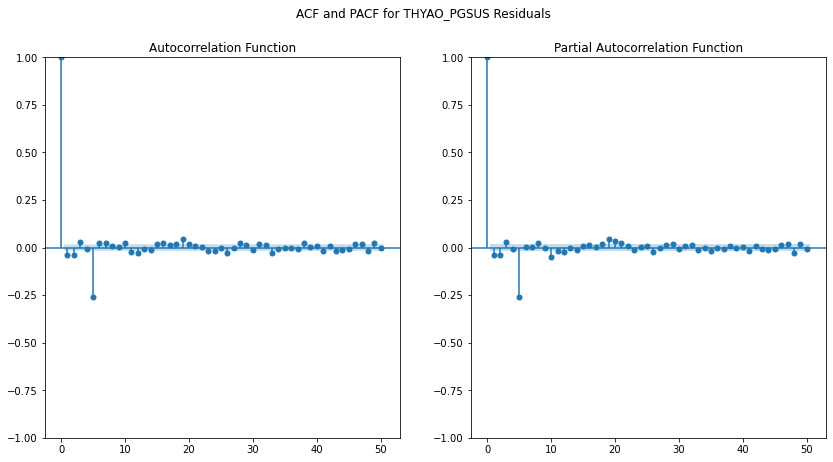

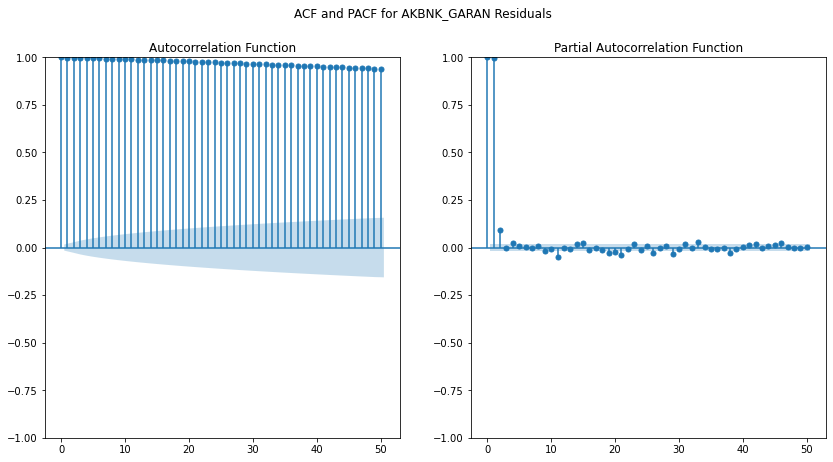

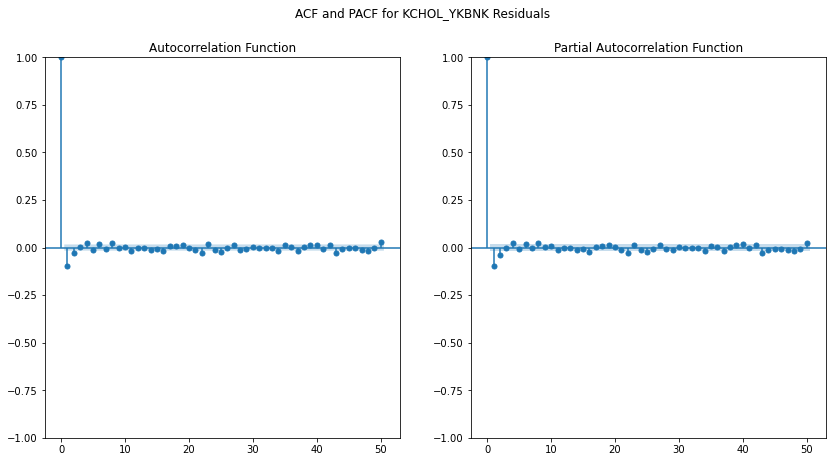

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to plot ACF and PACF with titles
def plot_acf_pacf(ratios, title):
    plt.figure(figsize=(14, 7))
    plt.suptitle(title)  # Set the title for the plots

    plt.subplot(121)
    plot_acf(ratios, lags=50, ax=plt.gca())
    plt.title('Autocorrelation Function')

    plt.subplot(122)
    plot_pacf(ratios, lags=50, ax=plt.gca())
    plt.title('Partial Autocorrelation Function')

    plt.show()


# Plotting ACF & PACF for ratios (differenced ratio versions for non-stationary ones)
plot_acf_pacf(result_df['THYAO_PGSUS_Ratio'].diff().dropna(), 'ACF and PACF for THYAO_PGSUS Residuals')
plot_acf_pacf(result_df['AKBNK_GARAN_Ratio'].dropna(), 'ACF and PACF for AKBNK_GARAN Residuals')
plot_acf_pacf(result_df['KCHOL_YKBNK_Ratio'].diff().dropna(), 'ACF and PACF for KCHOL_YKBNK Residuals')


THYAO_PGSUS Ratios:
The ACF almost cuts off after lag 0. There is a significant spike at lag 5 but this does not indicate MA (autocorrelation is a number resulting from a calculation, so a number does not always indicate a meaning)
The PACF also shows similar behaviour.
So the suggested model: ARIMA(0,1,0)
We can also try adjacent models to make sure. (ARIMA(1,1,0) , ARIMA(0,1,0))



AKBNK_GARAN Ratios:
ACF decays slowly while PACF almost cuts off after lag 1 (lag 2 may also be considered since it is out of the shaded area). So, we can try ARIMA(1,0,0) , ARIMA(2,0,0)



KCHOL_YKBNK Ratios:
ACF and PACF cuts off after lag 0 but lag 1 also be considered since it is out of the shaded area. So, we can try (ARIMA(0,1,0) , ARIMA(1,1,0))


In [91]:
from statsmodels.tsa.arima.model import ARIMA


# We need to investigate the selected models to see which one is better. 
# For the purpose of this assignment, AIC values and coefficint significance were the main criteria for selecting the models. However it should be noted that there are other statistics that may be analyzed further.


model_thyao_pgsus = ARIMA(result_df['THYAO_PGSUS_Ratio'], order=(0,1,0))
results_thyao_pgsus = model_thyao_pgsus.fit()
print(results_thyao_pgsus.summary())


model_thyao_pgsus = ARIMA(result_df['THYAO_PGSUS_Ratio'], order=(1,1,0))
results_thyao_pgsus = model_thyao_pgsus.fit()
print(results_thyao_pgsus.summary())


model_thyao_pgsus = ARIMA(result_df['THYAO_PGSUS_Ratio'], order=(0,1,1))
results_thyao_pgsus = model_thyao_pgsus.fit()
print(results_thyao_pgsus.summary())




model_akbnk_garan = ARIMA(result_df['AKBNK_GARAN_Ratio'], order=(1,0,0))
results_akbnk_garan = model_akbnk_garan.fit()
print(results_akbnk_garan.summary())


model_akbnk_garan = ARIMA(result_df['AKBNK_GARAN_Ratio'], order=(2,0,0))
results_akbnk_garan = model_akbnk_garan.fit()
print(results_akbnk_garan.summary())





model_kchol_ykbnk = ARIMA(result_df['KCHOL_YKBNK_Ratio'], order=(0,1,0))
results_kchol_ykbnk = model_kchol_ykbnk.fit()
print(results_kchol_ykbnk.summary())



model_kchol_ykbnk = ARIMA(result_df['KCHOL_YKBNK_Ratio'], order=(1,1,0))
results_kchol_ykbnk = model_kchol_ykbnk.fit()
print(results_kchol_ykbnk.summary())







                               SARIMAX Results                                
Dep. Variable:      THYAO_PGSUS_Ratio   No. Observations:                14637
Model:                 ARIMA(0, 1, 0)   Log Likelihood               24609.310
Date:                Mon, 11 Dec 2023   AIC                         -49216.620
Time:                        23:38:22   BIC                         -49209.029
Sample:                             0   HQIC                        -49214.098
                              - 14637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0020   6.52e-06    310.873      0.000       0.002       0.002
Ljung-Box (L1) (Q):                  21.41   Jarque-Bera (JB):            363354.65
Prob(Q):                              0.00   Pr

C:\Users\Esra\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      AKBNK_GARAN_Ratio   No. Observations:                14637
Model:                 ARIMA(1, 0, 0)   Log Likelihood               49974.421
Date:                Mon, 11 Dec 2023   AIC                         -99942.842
Time:                        23:38:28   BIC                         -99920.068
Sample:                             0   HQIC                        -99935.277
                              - 14637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5097      0.055     27.642      0.000       1.403       1.617
ar.L1          0.9988      0.000   3225.833      0.000       0.998       0.999
sigma2      6.335e-05      2e-07    316.024      0.0

C:\Users\Esra\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      KCHOL_YKBNK_Ratio   No. Observations:                14637
Model:                 ARIMA(1, 1, 0)   Log Likelihood               79718.180
Date:                Mon, 11 Dec 2023   AIC                        -159432.360
Time:                        23:38:35   BIC                        -159417.177
Sample:                             0   HQIC                       -159427.316
                              - 14637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0956      0.004    -22.244      0.000      -0.104      -0.087
sigma2      1.088e-06   5.03e-09    216.185      0.000    1.08e-06     1.1e-06
Ljung-Box (L1) (Q):                   0.21   Jarque-

THYAO_PGSUS: ARIMA(0,1,0) is selected because:
Even though the AIC value is not smaller, coefficients are not significant in other models at 95% confidence level


AKBNK_GARAN: ARIMA(2,0,0) is selected because:
AIC value is smaller,
Coefficients are significant at 95% confidence level

KCHOL_YKBANK: ARIMA(1,1,0) is selected because:
AIC value is smaller,
Coefficient is significant at 95% confidence level


In [92]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np



# Fit an ARIMA model to the ratios
model = ARIMA(result_df['THYAO_PGSUS_Ratio'], order=(0,1,0))
THYAO_PGSUS_results = model.fit()
# Get the in-sample fitted values and the residuals (errors) of the model
THYAO_PGSUS_fitted_values = THYAO_PGSUS_results.fittedvalues
THYAO_PGSUS_fitted_values[0] = result_df['THYAO_PGSUS_Ratio'][0]  #initialization
THYAO_PGSUS_residuals = result_df['THYAO_PGSUS_Ratio'] - THYAO_PGSUS_fitted_values



model = ARIMA(result_df['AKBNK_GARAN_Ratio'], order=(0,1,0))
AKBNK_GARAN_results = model.fit()
AKBNK_GARAN_fitted_values = AKBNK_GARAN_results.fittedvalues
AKBNK_GARAN_fitted_values[0] = result_df['AKBNK_GARAN_Ratio'][0]
AKBNK_GARAN_residuals = result_df['AKBNK_GARAN_Ratio'] - AKBNK_GARAN_fitted_values



model = ARIMA(result_df['KCHOL_YKBNK_Ratio'], order=(0,1,0))
KCHOL_YKBNK_results = model.fit()
KCHOL_YKBNK_fitted_values = KCHOL_YKBNK_results.fittedvalues
KCHOL_YKBNK_fitted_values[0] = result_df['KCHOL_YKBNK_Ratio'][0]
KCHOL_YKBNK_residuals = result_df['KCHOL_YKBNK_Ratio'] - KCHOL_YKBNK_fitted_values


# Put all the residuals in a data frame
advanced_residuals_df = []
advanced_residuals_df = pd.DataFrame({'THYAO_PGSUS_residuals': THYAO_PGSUS_residuals, 'AKBNK_GARAN_residuals': AKBNK_GARAN_residuals, 'KCHOL_YKBNK_residuals': KCHOL_YKBNK_residuals})
advanced_residuals_df


,THYAO_PGSUS_residuals,AKBNK_GARAN_residuals,KCHOL_YKBNK_residuals
0,0.000000,0.000000,0.000000
1,-0.010833,-0.005427,0.001293
2,0.040770,-0.002924,-0.001321
3,0.004984,0.000174,0.000808
4,-0.002607,-0.002682,-0.000727
...,...,...,...
14632,0.026381,0.000139,-0.000063
14633,-0.041697,0.005032,0.000057
14634,0.028741,-0.002917,0.000469
14635,0.029721,-0.000399,0.000722


In [93]:
# extracting the necessary columns including the stock pairs
stock_pairs = regression_results.drop(regression_results.columns[[2,3]], axis=1)
stock_pairs

,Stock1,Stock2
0,THYAO,PGSUS
1,AKBNK,GARAN
2,KCHOL,YKBNK


3. Plotting Control Chart for ARIMA Residuals:

A control chart was constructed for the residuals obtained from the ARIMA Model. This control chart assists in visually assessing whether the residuals exhibit any significant deviations, indicating potential trading opportunities.


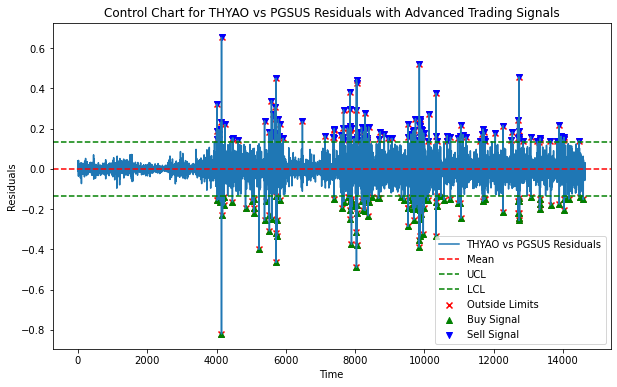

Buy Signals for THYAO vs PGSUS: 4021, 4048, 4067, 4113, 4131, 4143, 4151, 4171, 4201, 4211, 4458, 4836, 5022, 5074, 5075, 5087, 5224, 5384, 5435, 5508, 5525, 5594, 5715, 5722, 5725, 5735, 5744, 5835, 7392, 7628, 7669, 7788, 7814, 7847, 7848, 7862, 7867, 7882, 7885, 7893, 7894, 7914, 8027, 8037, 8044, 8045, 8063, 8188, 8228, 8238, 8252, 8283, 8284, 8323, 8328, 8338, 8377, 8383, 8402, 8487, 8672, 8682, 9336, 9417, 9522, 9534, 9535, 9606, 9642, 9667, 9674, 9680, 9689, 9709, 9725, 9744, 9764, 9775, 9787, 9791, 9825, 9846, 9855, 9856, 9862, 9877, 9884, 9895, 9965, 9975, 9985, 10036, 10102, 10327, 10344, 10347, 10362, 10468, 10568, 10748, 10963, 11032, 11050, 11677, 11727, 11732, 12266, 12691, 12705, 12716, 12718, 12730, 12736, 12740, 13067, 13320, 13329, 13335, 13638, 13889, 14019, 14025, 14074, 14164, 14476, 14581
Sell Signals for THYAO vs PGSUS: 4000, 4011, 4017, 4038, 4057, 4065, 4066, 4141, 4144, 4241, 4455, 4471, 4616, 5385, 5507, 5575, 5584, 5587, 5605, 5615, 5685, 5695, 5705, 5716, 5

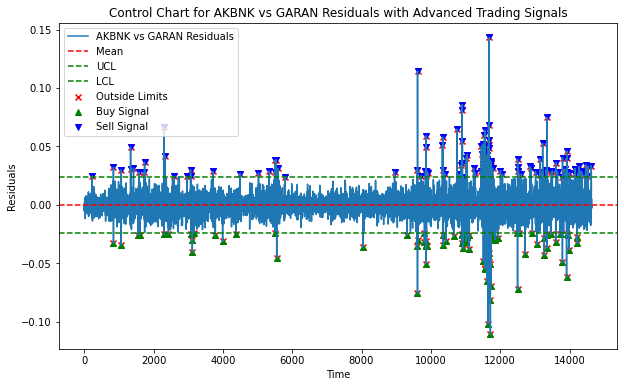

Buy Signals for AKBNK vs GARAN: 842, 1062, 1552, 1601, 2307, 2428, 3082, 3107, 3117, 3171, 3781, 3991, 4381, 5502, 5552, 8044, 9305, 9606, 9614, 9632, 9815, 9816, 9855, 9858, 9862, 9864, 9874, 10342, 10360, 10442, 10659, 10896, 10901, 10911, 10916, 10918, 10919, 10930, 10980, 11000, 11010, 11054, 11087, 11110, 11514, 11569, 11572, 11573, 11577, 11584, 11587, 11591, 11597, 11604, 11607, 11608, 11616, 11622, 11624, 11627, 11632, 11644, 11660, 11669, 11674, 11678, 11688, 11696, 11698, 11706, 11716, 11727, 11729, 11739, 11794, 11844, 11926, 12492, 12501, 12535, 12719, 12928, 13058, 13272, 13275, 13347, 13352, 13455, 13602, 13729, 13759, 13796, 13915, 13936, 13950, 13985, 14213, 14216
Sell Signals for AKBNK vs GARAN: 222, 841, 1068, 1336, 1340, 1420, 1580, 1734, 1740, 2306, 2337, 2587, 2957, 3067, 3077, 3721, 4491, 5026, 5335, 5503, 5509, 5525, 5585, 5795, 8951, 9604, 9615, 9715, 9845, 9854, 9861, 9871, 9872, 9875, 9915, 10332, 10343, 10363, 10400, 10752, 10810, 10873, 10900, 10903, 10909, 

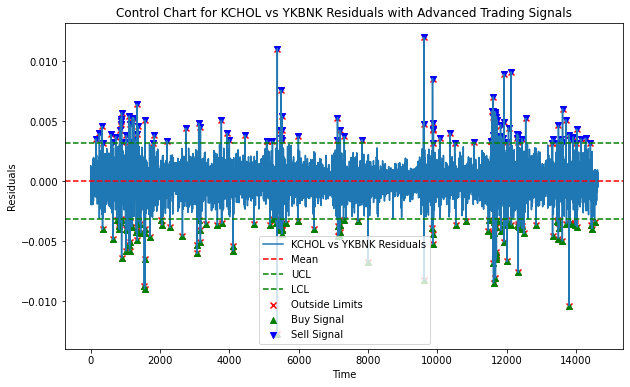

Buy Signals for KCHOL vs YKBNK: 343, 638, 752, 822, 826, 859, 867, 879, 893, 1008, 1022, 1054, 1062, 1118, 1122, 1129, 1139, 1197, 1317, 1333, 1341, 1356, 1362, 1420, 1443, 1552, 1556, 1557, 1560, 1580, 1707, 2037, 2063, 2287, 2648, 3068, 3077, 3127, 3166, 3169, 3317, 3656, 3788, 4103, 4111, 4705, 5169, 5254, 5326, 5344, 5384, 5445, 5474, 5491, 5510, 5522, 5529, 5552, 5635, 5975, 6449, 7127, 7133, 7160, 7180, 7183, 7200, 7296, 7713, 8003, 9615, 9839, 9869, 9872, 10533, 10823, 11473, 11507, 11607, 11610, 11616, 11624, 11637, 11647, 11679, 11685, 11686, 11687, 11696, 11698, 11706, 11724, 11834, 11919, 11927, 11932, 11967, 12008, 12011, 12037, 12138, 12318, 12328, 12338, 12371, 12382, 12432, 12451, 12501, 12851, 13327, 13451, 13477, 13494, 13495, 13519, 13609, 13729, 13808, 13833, 13834, 13979, 13988, 14029, 14446, 14466, 14539
Sell Signals for KCHOL vs YKBNK: 152, 252, 332, 344, 582, 633, 722, 852, 862, 872, 889, 892, 908, 1032, 1109, 1113, 1132, 1205, 1236, 1243, 1286, 1326, 1336, 1366,

In [94]:
# Dictionary to store buy and sell signals for each stock pair
buy_signals_dict = {}
sell_signals_dict = {}

# Function to create control charts and identify trading opportunities
def control_chart_with_advanced_trading_signals(residuals, stock_pair):
    # Calculate mean and standard deviation of residuals
    mean_residuals = residuals.mean()
    std_residuals = residuals.std()

    # Define control limits (typically set at 3 standard deviations)
    UCL = mean_residuals + 3 * std_residuals
    LCL = mean_residuals - 3 * std_residuals

    # Create time values for x-axis
    time_values = range(1, len(residuals) + 1)

    # Identify points outside control limits
    outside_limits = (residuals > UCL) | (residuals < LCL)

    # Initialize lists to store buy and sell signals
    buy_signals = []
    sell_signals = []

    # Plot residuals and control limits
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, residuals, label=f'{stock_pair} Residuals')
    plt.axhline(mean_residuals, color='red', linestyle='--', label='Mean')
    plt.axhline(UCL, color='green', linestyle='--', label='UCL')
    plt.axhline(LCL, color='green', linestyle='--', label='LCL')
    
    # Mark points outside control limits
    if any(outside_limits):
        plt.scatter(np.where(outside_limits)[0] + 1, residuals[outside_limits], color='red', marker='x', label='Outside Limits')
        
        # Identify potential trading opportunities
        sell_signals = np.where(residuals > UCL)[0] + 1
        buy_signals = np.where(residuals < LCL)[0] + 1

        # Mark buy signals
        if any(buy_signals):
            plt.scatter(buy_signals, residuals[buy_signals - 1], color='green', marker='^', label='Buy Signal')

        # Mark sell signals
        if any(sell_signals):
            plt.scatter(sell_signals, residuals[sell_signals - 1], color='blue', marker='v', label='Sell Signal')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.title(f'Control Chart for {stock_pair} Residuals with Advanced Trading Signals')
    plt.legend()
    
    # Show the plot
    plt.show()

    # Store buy and sell signals in the dictionary
    buy_signals_dict[stock_pair] = buy_signals
    sell_signals_dict[stock_pair] = sell_signals

    # Print buy and sell signals for the current stock pair
    print(f"Buy Signals for {stock_pair}: {', '.join(map(str, buy_signals))}")
    print(f"Sell Signals for {stock_pair}: {', '.join(map(str, sell_signals))}")
    print("\n")

# Loop through each pair of stocks and create control charts with trading signals
for index, row in stock_pairs.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']
    stock_pair = f'{stock1} vs {stock2}'
    
    # Extract residuals for the current pair
    residuals_col_name = f'{stock1}_{stock2}_residuals'
    residuals = advanced_residuals_df[residuals_col_name]

    # Create control chart with trading signals
    control_chart_with_advanced_trading_signals(residuals, stock_pair)

# Print the buy and sell signals dictionaries
print("Buy Signals Dictionary:")
print({key: ', '.join(map(str, value)) for key, value in buy_signals_dict.items()})
print("\nSell Signals Dictionary:")
print({key: ', '.join(map(str, value)) for key, value in sell_signals_dict.items()})


4. Generating New Buy and Sell Signals:

Based on the control chart for ARIMA residuals, new buy and sell signals were identified. These signals represent points where the residuals exceed established control limits, indicating potential trading actions.


5. Running Simulation with Revised Signals:

Using these new buy and sell signals, a revised trading simulation was conducted. In this simulation, buy and sell orders were executed for the corresponding stock pairs based on the signals derived from the ARIMA Model. The simulation tracked the performance of the advanced pairs trading strategy over a specified period, considering factors such as trading capital and transaction costs.


In [95]:
# Specify your initial trading capital
initial_capital = 1000000 

# Dictionary to store balances after each transaction
balances_dict = {}

# Function to simulate trading based on signals
def advanced_simulate_trading(stock_pair, buy_signals, sell_signals):
    capital = initial_capital
    position_size1 = 0  # Specify the number of stocks bought for stock1
    position_size2 = 0  # Specify the number of stocks bought for stock2
    balances = [capital]
    pair_list = stock_pair.split(" vs ")
    stock_name1 = pair_list[0]
    stock_name2 = pair_list[1]

    # Buy and sell simulation loop
    for i in range(max(len(buy_signals), len(sell_signals))):
        buy_index = buy_signals[i] - 1 if i < len(buy_signals) else 0
        sell_index = sell_signals[i] - 1 if i < len(sell_signals) else 0

        # Check if indices are within bounds and set prices for both stocks
        if (0 <= buy_index < len(residuals)) and (0 <= sell_index < len(residuals)):
            buy_price1 = dfs_by_short_name[stock_name1].iloc[buy_index]['price'] if buy_index != 0 else 0
            sell_price1 = dfs_by_short_name[stock_name1].iloc[sell_index]['price'] if sell_index != 0 else 0
            buy_price2 = dfs_by_short_name[stock_name2].iloc[buy_index]['price'] if buy_index != 0 else 0
            sell_price2 = dfs_by_short_name[stock_name2].iloc[sell_index]['price'] if sell_index != 0 else 0

            # Buy signal for stock1 and sell signal for stock2
            if buy_price1 != 0 and capital >= buy_price1*100:
                capital -= 100 * buy_price1
                position_size1 += 100

            if buy_price2 != 0 and position_size2 >= 100:
                capital += 100 * buy_price2
                position_size2 -= 100

            # Sell signal for stock1 and buy signal for stock2
            if sell_price1 != 0 and position_size1 >= 100:
                capital += 100 * sell_price1
                position_size1 -= 100

            if sell_price2 != 0 and capital >= sell_price2*100:
                capital -= 100 * sell_price2
                position_size2 += 100

        # Store balance after each transaction
        balances.append(capital)

    # Store balances in the dictionaries
    balances_dict[stock_pair] = balances

    # Print the final capital for the current stock pair
    print(f"Final Capital for {stock_pair}: {capital:.2f}")
    
    print(position_size1) # lot size for stock 1
    print(position_size2) # lot size for stock 2

    # Print the balances after each transaction
    print(f"Balances for {stock_pair} after each transaction: {balances}\n")

# Loop through each pair of stocks and simulate trading
for index, row in stock_pairs.iterrows():
    stock1 = row['Stock1']
    stock2 = row['Stock2']
    stock_pair = f'{stock1} vs {stock2}'
    
    # Extract residuals for the current pair
    residuals_col_name = f'{stock1}_{stock2}_residuals'
    residuals = advanced_residuals_df[residuals_col_name]

    # Extract buy and sell signals for the current pair
    buy_signals = buy_signals_dict.get(stock_pair, [])
    sell_signals = sell_signals_dict.get(stock_pair, [])

    # Simulate trading based on signals
    advanced_simulate_trading(stock_pair, buy_signals, sell_signals)
    
    

Final Capital for THYAO vs PGSUS: 308770.00
0
1900
Balances for THYAO vs PGSUS after each transaction: [1000000, 995075.0, 995553.0, 996502.0, 997139.0, 997555.0, 996839.0, 996706.0, 996109.0, 995612.0, 995863.0, 995742.0, 997210.0, 997991.0, 1000357.0, 1004258.0, 1007809.0, 1010784.0, 1011909.0, 1013063.0, 1012749.0, 1010532.0, 1008344.0, 1007817.0, 1007286.0, 1007488.0, 1007107.0, 1007049.0, 1007158.0, 1008256.0, 1010388.0, 1012350.0, 1013772.0, 1014281.0, 1015164.0, 1015679.0, 1017198.0, 1017806.0, 1019535.0, 1021236.0, 1022968.0, 1024689.0, 1025862.0, 1025835.0, 1024530.0, 1023456.0, 1021954.0, 1020764.0, 1018707.0, 1016733.0, 1013986.0, 1011783.0, 1011573.0, 1011199.0, 1011474.0, 1012157.0, 1012817.0, 1013543.0, 1014076.0, 1014558.0, 1015660.0, 1016146.0, 1016667.0, 1017549.0, 1019121.0, 1019963.0, 1021248.0, 1022365.0, 1024516.0, 1026044.0, 1027107.0, 1028945.0, 1030553.0, 1031208.0, 1031082.0, 1032935.0, 1033996.0, 1035883.0, 1037904.0, 1040284.0, 1042062.0, 1043555.0, 1042279.0

Comparison Between ARIMA Model fitting to the ratio of stocks and lineer regression model

Linear Regression with Constant Variance Assumption:

Differences:
Linearity and Independence: Linear regression assumes a linear relationship between the independent and dependent variables. It also assumes independence of residuals.
Constant Variance (Homoscedasticity): The constant variance assumption implies that the spread of residuals remains constant across all levels of the independent variable. This assumption is crucial for the validity of statistical inferences.
Stationarity: Linear regression assumes that the underlying time series data is stationary, meaning its statistical properties do not change over time.

Assumptions:
Normality of Residuals: The residuals are assumed to follow a normal distribution.
No Autocorrelation: Residuals should be independent of each other, with no autocorrelation.
Linearity: The relationship between variables is assumed to be linear.

ARIMA Model for Ratios of Stocks:

Differences:
Time Series Nature: ARIMA models are designed specifically for time series data, capturing temporal dependencies and trends.
Integration Component (I): ARIMA includes an integrated component to achieve stationarity, which is often necessary for time series modeling.
Seasonality: ARIMA can handle seasonality in time series data, capturing periodic patterns.

Assumptions:
Stationarity: The data should be stationary or transformable to achieve stationarity through differencing.
No Autocorrelation: Like linear regression, ARIMA assumes no autocorrelation in the residuals.
Normality of Residuals: While not explicitly assuming normality, ARIMA models often benefit from normally distributed residuals for more robust results.
Constant Variance: ARIMA does not explicitly assume constant variance, but it implicitly assumes that the variance is not time-dependent.
Summary of Comparative Analysis:
By looking at the plot showing residuals in the Task 1, we can see that the constant variance is violated even if we assumed there is constant variance. Therefore, using a time series analysis method like ARIMA enables us to get rid of constant variance assumption. Also, since the BIST30 data is a time-series data, ARIMA model will be a better approximation to obtain residuals. By looking at the results of the simulation, we can see the gains out of advanced fitting method with ARIMA is higher.


COMPARISON BETWEEN THE RESULTS OF THE SIMULATON

Part 1 Results: 

Final Capital for THYAO vs PGSUS: 9900.00
Final Capital for AKBNK vs GARAN: 125783.78
Final Capital for KCHOL vs YKBNK: 335261.63


Part 2 Results:

Final Capital for THYAO vs PGSUS: 308770.00
Final Capital for AKBNK vs GARAN: 887884.22
Final Capital for KCHOL vs YKBNK: 964238.66


As seen above, Part 2 results are higher, which means ARIMA model has better fitted the data than the linear regression model. 

It should be noted that there are remaining stock lots at hand and they may be further analyzed.

Discussion

Part 1: Linear Regression with Constant Variance Assumption

Effectiveness:

Simplicity and Interpretability: Linear regression is a straightforward and interpretable model, making it accessible for analysis. The constant variance assumption simplifies the modeling process.
Transparency in Residual Analysis: Control charts derived from linear regression residuals provide a transparent visual representation of deviations from the mean relationship, making it easy to identify potential trading opportunities.
Suitability for Well-Behaved Data: Linear regression can be highly effective when the relationship between variables is approximately linear and adheres to the constant variance assumption.

Limitations:
Assumption Sensitivity: Linear regression is sensitive to its underlying assumptions, and deviations from these assumptions can impact the reliability of results.
Inability to Capture Nonlinear Relationships: Linear regression may not capture complex, nonlinear relationships between variables effectively.
Limited to Well-Behaved Markets: In markets with sudden and drastic changes, linear regression might struggle to adapt, as it assumes a stable relationship over time.

Part 2: ARIMA Model for Ratio of Stocks

Effectiveness:
Time Series Dynamics: The ARIMA model excels in capturing time series dynamics, including trends and seasonality, making it well-suited for financial time series data.
Handling Non-Stationarity: ARIMA's integration component allows for the modeling of non-stationary time series data, making it effective in cases where stationarity is not inherent.
Adaptability to Market Changes: ARIMA is more adaptable to changing market conditions, as it inherently considers the temporal aspects of the data.

Limitations:
Complexity and Interpretability: ARIMA models can be complex and less intuitive for interpretation, especially for individuals without a strong background in time series analysis.
Sensitivity to Model Parameters: ARIMA models require careful tuning of parameters, and improper selection can lead to suboptimal results.
Overall Considerations:
Data Characteristics: The choice between linear regression and ARIMA should consider the characteristics of the data. Linear regression may be more suitable for well-behaved data with linear relationships, while ARIMA is adept at handling time series intricacies.
Trade-Offs: Linear regression provides simplicity but may lack adaptability, while ARIMA offers flexibility but requires careful parameter tuning and may be less intuitive.



Conclusion

Task 1: Linear Regression with Constant Variance Assumption

Findings:

Correlated Stock Pairs: Identified highly correlated stock pairs such as THYAO-PGSUS, AKBNK-GARAN, and KCHOL-YKBNK.
Regression Modeling: Fitted linear regression models to these pairs, emphasizing a constant variance assumption.
Control Chart Analysis: Generated control charts for residuals to monitor deviations from the expected relationship.
Simulation Results: Conducted a trading simulation based on control chart signals, quantifying potential gains over a specified period.

Insights:

Transparency in Strategy: Linear regression and control charts provided a transparent framework for identifying potential trading opportunities based on deviations from historical relationships.
Sensitivity to Assumptions: The effectiveness of the strategy was contingent on the constant variance assumption, and sensitivity to deviations from linear relationships.

Part 2: ARIMA Model for Ratio of Stocks

Findings:

Ratios and ARIMA Modeling: Calculated ratios between stock pairs and applied the ARIMA model for advanced time series analysis.
Control Chart for ARIMA Residuals: Plotted control charts for residuals obtained from the ARIMA model.
Revised Buy and Sell Signals: Generated new buy and sell signals based on ARIMA control chart analysis.
Comparative Analysis: Compared outcomes of the advanced strategy with the basic strategy, incorporating insights from time series analysis.

Insights:

Temporal Dynamics: ARIMA, by considering time series dynamics, captured more nuanced patterns, offering a potentially more adaptive strategy.
Increased Complexity: The ARIMA approach introduced complexity but provided a means to capture non-linear relationships and adapt to changing market conditions.
Overall Insights:
Trade-Offs Between Complexity and Simplicity: Linear regression offered simplicity and interpretability but struggled with non-linear relationships. ARIMA, although more complex, provided adaptability to temporal dynamics.
Sensitivity to Assumptions: Both approaches were sensitive to underlying assumptions, requiring careful consideration and potentially impacting the robustness of trading strategies.
Comparative Analysis Importance: The comparative analysis between basic and advanced strategies facilitated a comprehensive understanding of the relative effectiveness of the two methodologies in pairs trading.
In conclusion, the assignment provided valuable insights into the trade-offs, strengths, and limitations of employing statistical methods in pairs trading, offering a nuanced perspective on the dynamics of BIST30 stock indices and the potential effectiveness of different analytical approaches.

